In [1]:
using Pkg
Pkg.add("Interact")
Pkg.add("Optim")
Pkg.add("Conda")
Pkg.add("IJulia")
Pkg.add("Mux")
Pkg.add("WebIO")

    Updating registry at `C:\Users\周天恒\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Project.toml`
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Manifest.toml`
Precompiling project...
  ✗ GLMakie
  0 dependencies successfully precompiled in 202 seconds (572 already precompiled)
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the package
   Resolving package versions...
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Project.toml`
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Project.toml`
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Project.

In [2]:
using Pkg
Pkg.add("DynamicalSystems")

   Resolving package versions...
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Project.toml`
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Manifest.toml`


In [3]:
Pkg.add("Pluto")

   Resolving package versions...
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Project.toml`
  No Changes to `C:\Users\周天恒\Desktop\课程\英国布里斯托\Bristol课程\DSP\Julia\Manifest.toml`


In [4]:
using Conda
Conda.pip_interop(true)
Conda.pip("install", "webio_jupyter_extension")

using WebIO
#WebIO.install_jupyter_nbextension()
using Interact

┌ Info: Running `conda config --set pip_interop_enabled true --file 'C:\Users\周天恒\.julia\conda\3\condarc-julia.yml'` in root environment
└ @ Conda C:\Users\周天恒\.julia\packages\Conda\x2UxR\src\Conda.jl:127
┌ Info: Running `pip install webio_jupyter_extension` in root environment
└ @ Conda C:\Users\周天恒\.julia\packages\Conda\x2UxR\src\Conda.jl:453


WebIO._IJuliaInit()

In [5]:
#using PlotlyJS

LoadError: ArgumentError: Package PlotlyJS not found in current path:
- Run `import Pkg; Pkg.add("PlotlyJS")` to install the PlotlyJS package.


In [6]:
using DifferentialEquations
using DiffEqFlux
using DiffEqSensitivity, OrdinaryDiffEq, Zygote
using Plots
#using Flux, Optim



┌ Info: Precompiling DifferentialEquations [0c46a032-eb83-5123-abaf-570d42b7fbaa]
└ @ Base loading.jl:1423
┌ Info: Precompiling DiffEqFlux [aae7a2af-3d4f-5e19-a356-7da93b79d9d0]
└ @ Base loading.jl:1423
┌ Warning: OrcV2 initialization failed with
│   err =
│    could not load library "C:\Users\周天恒\.julia\artifacts\12030a5c187a7e327b57d45e3397edf672ab442d\bin\libLLVMExtra-12.dll"
│    The specified procedure could not be found. 
└ @ Enzyme.Compiler.JIT C:\Users\周天恒\.julia\packages\Enzyme\di3zM\src\compiler\orcv2.jl:103
┌ Warning: OrcV2 initialization failed with
│   err =
│    could not load library "C:\Users\周天恒\.julia\artifacts\12030a5c187a7e327b57d45e3397edf672ab442d\bin\libLLVMExtra-12.dll"
│    The specified procedure could not be found. 
└ @ Enzyme.Compiler.JIT C:\Users\周天恒\.julia\packages\Enzyme\di3zM\src\compiler\orcv2.jl:103
  ** incremental compilation may be fatally broken for this module **

┌ Warning: OrcV2 initialization failed with
│   err = ErrorException("could not load

In [7]:
?ODEProblem

search: ODEProblem RODEProblem SplitODEProblem DynamicalODEProblem



Defines an ordinary differential equation (ODE) problem. Documentation Page: https://diffeq.sciml.ai/stable/types/ode_types/

## Mathematical Specification of an ODE Problem

To define an ODE Problem, you simply need to give the function $f$ and the initial condition $u_0$ which define an ODE:

$$
M \frac{du}{dt} = f(u,p,t)
$$

There are two different ways of specifying `f`:

  * `f(du,u,p,t)`: in-place. Memory-efficient when avoiding allocations. Best option for most cases unless mutation is not allowed.
  * `f(u,p,t)`: returning `du`. Less memory-efficient way, particularly suitable when mutation is not allowed (e.g. with certain automatic differentiation packages such as Zygote).

`u₀` should be an AbstractArray (or number) whose geometry matches the desired geometry of `u`. Note that we are not limited to numbers or vectors for `u₀`; one is allowed to provide `u₀` as arbitrary matrices / higher dimension tensors as well.

For the mass matrix $M$, see the documentation of `ODEFunction`.

## Problem Type

### Constructors

`ODEProblem` can be constructed by first building an `ODEFunction` or by simply passing the ODE right-hand side to the constructor. The constructors are:

  * `ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters();kwargs...)`
  * `ODEProblem{isinplace}(f,u0,tspan,p=NullParameters();kwargs...)` : Defines the ODE with the specified functions. `isinplace` optionally sets whether the function is inplace or not. This is determined automatically, but not inferred.

Parameters are optional, and if not given then a `NullParameters()` singleton will be used which will throw nice errors if you try to index non-existent parameters. Any extra keyword arguments are passed on to the solvers. For example, if you set a `callback` in the problem, then that `callback` will be added in every solve call.

For specifying Jacobians and mass matrices, see the `ODEFunction` documentation.

### Fields

  * `f`: The function in the ODE.
  * `u0`: The initial condition.
  * `tspan`: The timespan for the problem.
  * `p`: The parameters.
  * `kwargs`: The keyword arguments passed onto the solves.

## Example Problems

Example problems can be found in [DiffEqProblemLibrary.jl](https://github.com/JuliaDiffEq/DiffEqProblemLibrary.jl/tree/master/src/ode).

To use a sample problem, such as `prob_ode_linear`, you can do something like:

```julia
#] add DiffEqProblemLibrary
using DiffEqProblemLibrary.ODEProblemLibrary
# load problems
ODEProblemLibrary.importodeproblems()
prob = ODEProblemLibrary.prob_ode_linear
sol = solve(prob)
```

---

```
ODEProblem(f::ODEFunction,u0,tspan,p=NullParameters(),callback=CallbackSet())
```

Define an ODE problem from an [`ODEFunction`](@ref).


## 1. Basic ODE

In [8]:
@time begin
function fiip(du,u,p,t)
  du[1] = dx = p[1]*u[1] - p[2]*u[1]*u[2]
  du[2] = dy = -p[3]*u[2] + p[4]*u[1]*u[2]
end
p = [1.5,1.0,3.0,1.0]; u0 = [1.0;1.0]
prob = ODEProblem(fiip,u0,(0.0,10.0),p)
sol = solve(prob,Tsit5())
loss(u0,p) = sum(solve(prob,Tsit5(),u0=u0,p=p,saveat=0.1))
du01,dp1 = Zygote.gradient(loss,u0,p)
    
end

105.732881 seconds (198.37 M allocations: 14.096 GiB, 4.10% gc time, 100.04% compilation time)


([-39.494309131413694, -8.631888203763246], [7.349039360102889, -159.3107987785758, 74.93924800431954, -339.3272380777999])

 26.609490 seconds (56.85 M allocations: 4.282 GiB, 4.58% gc time, 99.90% compilation time)


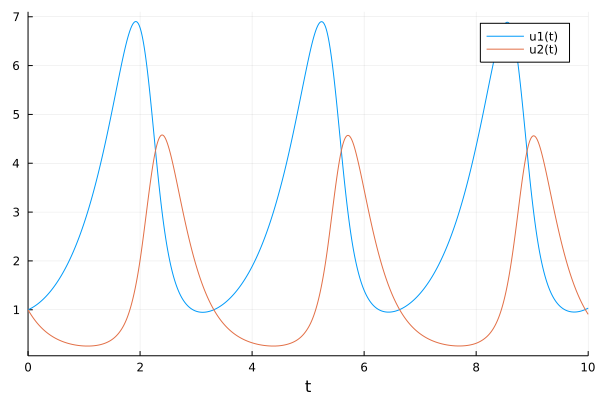

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5CkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1w4OWMyYmE3Y2M5MTBhNWE2Nzk5ZDI3NzM1NDIyZDQwNDBjYWVmYzhmXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXDg5YzJiYTdjYzkxMGE1YTY3OTlkMjc3MzU0MjJkNDA0MGNhZWZjOGZcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQo=


In [9]:
@time begin
    
function lotka_volterra!(du, u, p, t)
  x, y = u
  α, β, δ, γ = p
  du[1] = dx = α*x - β*x*y
  du[2] = dy = -δ*y + γ*x*y
end

# Initial condition
u0 = [1.0, 1.0]

# Simulation interval and intermediary points
tspan = (0.0, 10.0)
tsteps = 0.0:0.1:10.0

# LV equation parameter. p = [α, β, δ, γ]
p = [1.5, 1.0, 3.0, 1.0]

# Setup the ODE problem, then solve
prob_ode = ODEProblem(lotka_volterra!, u0, tspan, p)
sol_ode = solve(prob_ode, Tsit5())
plot(sol_ode)
    
end

In [10]:
using Interact

In [11]:
@manipulate for k = -3:.1:1, x0 = -3:.1:3
    f(x,p,t) = k*x
    tspan = (0.0,3.0)
    prob = ODEProblem(f,x0,tspan)
    sol = solve(prob,Tsit5(),reltol=1e-8,abstol = 1e-8)
    #println(sol)
    
    plot(sol,linewidth = 5, title = "Solution to the Linear ODE",
        xaxis = "Time(t)",yaxis = "u(t)",label = "My Thick Line")
    plot!(sol.t,t->x0*exp(k*t),lw = 3, ls = :dash, label = "True Solution!", ylims = (-4,5))
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["k"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 41, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{Observables.AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing), "index" => (Observable{Any} with 2 listeners. Value:
21, nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\周天恒\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\周天恒\\.julia\\packages\\Knockout\\3gjS1\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\周天恒\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\周天恒\\.julia\\packages\\InteractBase\\h8Fwe\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\周天恒\\.julia\\packages\\Interact\\pVyN2\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000009f0d7a30, Task (runnable) @0x000000009f0d7a30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"-3.0\",\"-2.9\",\"-2.8\",\"-2.7\",\"-2.6\",\"-2.5\",\"-2.4\",\"-2.3\",\"-2.2\",\"-2.1\",\"-2.0\",\"-1.9\",\"-1.8\",\"-1.7\",\"-1.6\",\"-1.5\",\"-1.4\",\"-1.3\",\"-1.2\",\"-1.1\",\"-1.0\",\"-0.9\",\"-0.8\",\"-0.7\",\"-0.6\",\"

base64 binary data: b3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpvcGVuOiBObyBzdWNoIGZpbGUgb3IgZGlyZWN0b3J5Cm9wZW46IE5vIHN1Y2ggZmlsZSBvciBkaXJlY3RvcnkKb3BlbjogTm8gc3VjaCBmaWxlIG9yIGRpcmVjdG9yeQpHS1M6IGZpbGUgb3BlbiBlcnJvciAoQzpcVXNlcnNc1tzM7LrjXC5qdWxpYVxhcnRpZmFjdHNcODljMmJhN2NjOTEwYTVhNjc5OWQyNzczNTQyMmQ0MDQwY2FlZmM4ZlxiaW5cLi5cRk9OVFNcR0tTRk9OVC5EQVQpCkdLUzogZmlsZSBvcGVuIGVycm9yIChDOlxVc2Vyc1zW3MzsuuNcLmp1bGlhXGFydGlmYWN0c1w4OWMyYmE3Y2M5MTBhNWE2Nzk5ZDI3NzM1NDIyZDQwNDBjYWVmYzhmXGJpblwuLlxGT05UU1xHS1NGT05ULkRBVCkKR0tTOiBmaWxlIG9wZW4gZXJyb3IgKEM6XFVzZXJzXNbczOy641wuanVsaWFcYXJ0aWZhY3RzXDg5YzJiYTdjYzkxMGE1YTY3OTlkMjc3MzU0MjJkNDA0MGNhZWZjOGZcYmluXC4uXEZPTlRTXEdLU0ZPTlQuREFUKQpHS1M6IGZpbGUgb3BlbiBlcnJvciAoQzpcVXNlcnNc1tzM7LrjXC5qdWxpYVxhcnRpZmFjdHNcODljMmJhN2NjOTEwYTVhNjc5OWQyNzczNTQyMmQ0MDQwY2FlZmM4ZlxiaW5cLi5cRk9OVFNcR0tTRk9OVC5EQVQpCg==


In [12]:
using Interact,WebIO
s = slider(0:.1:1,label="Slider X:")
node(s)

(div { className="interact-flex-row interact-widget" }
  (div { className="interact-flex-row-left" }
    (label { className="interact " style=Dict{Any, Any}(:padding => "5px 10px 0px 10px") }
      "Slider X:"))
  (div { className="interact-flex-row-center" }
    (input { max=11 min=1 attributes=Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal") step=1 className="slider slider is-fullwidth" style=Dict{Any, Any}() }))
  (div { className="interact-flex-row-right" }
    (p { attributes=Dict("data-bind" => "text: formatted_val") })))

In [13]:
using Interact


## 2. UDE Apox

In [ ]:
u0 = Float32[2.; 0.]
datasize = 30
tspan = (0.0f0,1.5f0)

function trueODEfunc(du,u,p,t)
    true_A = [-0.1 2.0; -2.0 -0.1]
    du .= ((u.^3)'true_A)'
end
t = range(tspan[1],tspan[2],length=datasize)
prob = ODEProblem(trueODEfunc,u0,tspan)
ode_data = Array(solve(prob,Tsit5(),saveat=t))

dudt2 = Chain(x -> x.^3,
             Dense(2,50,tanh),
             Dense(50,2))
p,re = Flux.destructure(dudt2) # use this p as the initial condition!
dudt(u,p,t) = re(p)(u) # need to restrcture for backprop!
prob = ODEProblem(dudt,u0,tspan)

function predict_n_ode()
  Array(solve(prob,Tsit5(),u0=u0,p=p,saveat=t))
end

function loss_n_ode()
    pred = predict_n_ode()
    loss = sum(abs2,ode_data .- pred)
    loss
end

loss_n_ode() # n_ode.p stores the initial parameters of the neural ODE

cb = function (;doplot=false) #callback function to observe training
  pred = predict_n_ode()
  display(sum(abs2,ode_data .- pred))
  # plot current prediction against data
  pl = scatter(t,ode_data[1,:],label="data")
  scatter!(pl,t,pred[1,:],label="prediction")
  display(plot(pl))
  return false
end

# Display the ODE with the initial parameter values.
cb()

data = Iterators.repeated((), 1000)
Flux.train!(loss_n_ode, Flux.params(u0,p), data, ADAM(0.05), cb = cb)

In [24]:
predict_n_ode()

2×30 Matrix{Float32}:
 2.04277   1.94203   1.76757  1.22168  …  1.40494   1.37527   1.27908
 0.061231  0.772078  1.43339  1.79377     0.419191  0.702846  0.975587

In [15]:
ode_data

2×30 Matrix{Float32}:
 2.0  1.9465    1.74178  1.23837  0.577127  …  1.40688   1.37023   1.29214
 0.0  0.798832  1.46473  1.80877  1.86465      0.451377  0.728699  0.972102

In [25]:
loss_n_ode()

0.018211693f0

### ODE System with Constraint

In [ ]:
using Flux, DiffEqFlux, OrdinaryDiffEq, Optim, Test, Plots

# A desired MWE for now, not a test yet.
function f!(du, u, p, t)
    y₁, y₂, y₃ = u
    k₁, k₂, k₃ = p
    du[1] = -k₁*y₁ + k₃*y₂*y₃
    du[2] =  k₁*y₁ - k₃*y₂*y₃ - k₂*y₂^2
    du[3] =  y₁ + y₂ + y₃ - 1
    return nothing
end

u₀ = [1.0, 0, 0]
M = [1. 0  0
     0  1. 0
     0  0  0]

tspan = (0.0,1.0)
p = [0.04, 3e7, 1e4]

stiff_func = ODEFunction(f!, mass_matrix = M)
prob_stiff = ODEProblem(stiff_func, u₀, tspan, p)
sol_stiff = solve(prob_stiff, Rodas5(), saveat = 0.1)

nn_dudt2 = FastChain(FastDense(3, 64, tanh),
                     FastDense(64, 2))

model_stiff_ndae = NeuralODEMM(nn_dudt2, (u, p, t) -> [u[1] + u[2] + u[3] - 1],
                               tspan, M, Rodas5(), saveat = 0.1)
model_stiff_ndae(u₀)

function predict_stiff_ndae(p)
    return model_stiff_ndae(u₀, p)
end

function loss_stiff_ndae(p)
    pred = predict_stiff_ndae(p)
    loss = sum(abs2, Array(sol_stiff) .- pred)
    return loss, pred
end

callback = function (p, l, pred) #callback function to observe training
  display(l)
  return false
end

l1 = first(loss_stiff_ndae(model_stiff_ndae.p))
result_stiff = DiffEqFlux.sciml_train(loss_stiff_ndae, model_stiff_ndae.p,
                                      BFGS(initial_stepnorm = 0.001),
                                      cb = callback, maxiters = 100)

## Neural Second Order Ordinary Differential Equation

In [27]:
using OrdinaryDiffEq, Flux, DiffEqFlux, DiffEqSensitivity, Zygote

u0 = Float32[0.; 2.]
du0 = Float32[0.; 0.]
tspan = (0.0f0, 1.0f0)
t = range(tspan[1], tspan[2], length=20)

model = FastChain(FastDense(2, 50, tanh), FastDense(50, 2))
p = initial_params(model)
ff(du,u,p,t) = model(u,p)
prob = SecondOrderODEProblem{false}(ff, du0, u0, tspan, p)

function predict(p)
    Array(solve(prob, Tsit5(), p=p, saveat=t))
end

correct_pos = Float32.(transpose(hcat(collect(0:0.05:1)[2:end], collect(2:-0.05:1)[2:end])))

function loss_n_ode(p)
    pred = predict(p)
    sum(abs2, correct_pos .- pred[1:2, :]), pred
end

data = Iterators.repeated((), 1000)
opt = ADAM(0.01)

l1 = loss_n_ode(p)

cb = function (p,l,pred)
    println(l)
    l < 0.01
end

res = DiffEqFlux.sciml_train(loss_n_ode, p, opt, cb=cb, maxiters = 1000)

┌ Warning: FastChain is being deprecated in favor of Lux.jl. Lux.jl uses functions with explicit parameters f(u,p) like FastChain, but is fully featured and documented machine learning library. See the Lux.jl documentation for more details.
└ @ DiffEqFlux C:\Users\周天恒\.julia\packages\DiffEqFlux\Te0lc\src\fast_layers.jl:9


36.95794


┌ Warning: sciml_train is being deprecated in favor of direct usage of Optimization.jl. Please consult the Optimization.jl documentation for more details. Optimization.jl's PolyOpt solver is the polyalgorithm of sciml_train
└ @ DiffEqFlux C:\Users\周天恒\.julia\packages\DiffEqFlux\Te0lc\src\train.jl:6


29.777477
24.717237
22.097664
21.50829
22.387997
23.740728
24.562958
24.57377
23.988905
23.112823
22.235458
21.591486
21.28607
21.283289
21.47267
21.734848
21.963163
22.075733
22.036865
21.867105
21.623375
21.367464
21.148792
21.002573
20.945414
20.965918
21.027197
21.086666
21.11386
21.093586
21.024523
20.921007
20.80922
20.713768
20.647484
20.611855
20.60069
20.601212
20.597431
20.577389
20.537735
20.481836
20.416462
20.350443
20.292385
20.246473
20.210855
20.180138
20.1482
20.10956
20.061144
20.004097
19.942675
19.881308
19.823
19.76874
19.717108
19.66462
19.607815
19.544844
19.475742
19.401955
19.325739
19.248997
19.172104
19.093918
19.012688
18.926912
18.835941
18.740276
18.64123
18.539928
18.43658
18.330486
18.22048
18.105562
17.985485
17.8609
17.73284
17.602077
17.468822
17.332865
17.193937
17.05212
16.907969
16.762238
16.615437
16.467628
16.318571
16.1681
16.0164
15.863988
15.711393
15.558935
15.406666
15.254573
15.102849
14.951951
14.802522
14.655207
14.51048
14.3687315
14.230

u: 252-element Vector{Float32}:
  2.6800873
  0.17048575
  5.5441403
  7.2634845
 -0.0022678538
  7.712565
 -0.4801405
 -0.53757614
 -0.81815
 -2.5843399
 -5.6558824
  1.4807096
 -0.69569296
  ⋮
  0.15864691
 -0.36755964
  0.47767046
  0.5866015
  0.07546453
 -0.6326446
 -0.40963164
 -2.1679618
  0.5198052
  0.2732356
  0.2236324
  0.36467534

In [28]:
prob

ODEProblem with uType ArrayPartition{Float32, Tuple{Vector{Float32}, Vector{Float32}}} and tType Float32. In-place: false
timespan: (0.0f0, 1.0f0)
u0: (Float32[0.0, 0.0], Float32[0.0, 2.0])

In [31]:
loss_n_ode(p)

(36.95794f0, Float32[0.0 0.05525072 … 0.94413394 0.9907229; 0.0 0.01721694 … 0.35119307 0.37561253; 0.0 0.001454083 … 0.45905867 0.5099799; 2.0 2.000453 … 2.1565912 2.1757143])

In [33]:
predict(p)

4×20 Matrix{Float32}:
 0.0  0.0552507   0.110448    0.165538   …  0.896684  0.944134  0.990723
 0.0  0.0172169   0.0344771   0.0518235     0.327512  0.351193  0.375613
 0.0  0.00145408  0.00581492  0.0130783     0.410612  0.459059  0.50998
 2.0  2.00045     2.00181     2.00408       2.13873   2.15659   2.17571

In [34]:
correct_pos

2×20 Matrix{Float32}:
 0.05  0.1  0.15  0.2  0.25  0.3  0.35  …  0.75  0.8  0.85  0.9  0.95  1.0
 1.95  1.9  1.85  1.8  1.75  1.7  1.65     1.25  1.2  1.15  1.1  1.05  1.0